In [24]:
import sympy as sp
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.optimize import minimize
import pyPI as pi

In [25]:
# Campo a la salida del primer beam splitter
E_in = pi.polarization_basis_set('P45')

In [26]:
def experiment_simulation(E_in, chi, alpha):
    print('Input vector for each polarization generator:')
    print(pi.field_notation(E_in, p=True))
    print('\nBirefringent sample matrix:')
    S = pi.jones_matrix(chi, alpha)
    print(S)

    print('\nReconstruction of output vectors:\n')

    print('Reference arm electric field for the first measurement')
    alpha_HWP_R1, alpha_QWP_R1 = pi.PSG_calculator(E_in, pi.polarization_basis_set('H'), p=True)
    E_r1 = pi.field_notation(pi.PSG(alpha_HWP_R1, alpha_QWP_R1) @ E_in, p=True)

    print('\nReference arm electric field for the second measurement')
    alpha_HWP_R2, alpha_QWP_R2 = pi.PSG_calculator(E_in, pi.polarization_basis_set('P45'), p=True)
    E_r2 = pi.field_notation(pi.PSG(alpha_HWP_R2, alpha_QWP_R2) @ E_in, p=True)

    print('\nIncident electric field in the sample for the first output field')
    alpha_HWP_IS_1, alpha_QWP_IS_1 = pi.PSG_calculator(E_in, pi.polarization_basis_set('L'), p=True)
    E_is_1 = pi.field_notation(pi.PSG(alpha_HWP_IS_1, alpha_QWP_IS_1) @ E_in, p=True)

    print('\nIncident electric field in the sample for the second output field')
    alpha_HWP_IS_2, alpha_QWP_IS_2 = pi.PSG_calculator(E_in, pi.polarization_basis_set('R'), p=True)
    E_is_2 = pi.field_notation(pi.PSG(alpha_HWP_IS_2, alpha_QWP_IS_2) @ E_in, p=True)

    print('\nReconstruction of the first output field:\n')
    E_s_1 = pi.field_notation(S @ E_is_1)
    print('First interferogram:')
    info_1 = pi.numeric_intensity(E_r1, E_s_1, n=20, plot=True)

    print('\nSecond interferogram:')
    info_2 = pi.numeric_intensity(E_r2, E_s_1, n=20, plot=True)

    E_s_1_c = pi.Es_numeric_recosntruction(info_1, info_2)
    print('First output field calculation:')
    print(E_s_1_c)

    print('\nReconstruction of the second output field:\n')
    E_s_2 = pi.field_notation(S @ E_is_2)
    print('First interferogram:')
    info_3 = pi.numeric_intensity(E_r1, E_s_2, n=20, plot=True)

    print('\nSecond interferogram:')
    info_4 = pi.numeric_intensity(E_r2, E_s_2, n=20, plot=True)

    E_s_2_c = pi.Es_numeric_recosntruction(info_3, info_4)
    print('Second output field calculation:')
    print(E_s_2_c)

    print('\nBirefringence determination')
    x_vectors, b_vectors = [E_is_1, E_is_2], [E_s_1_c, E_s_2_c]

    A, alpha_calculated = pi.determine_A(x_vectors, b_vectors, p=True)
    chi_calculated = pi.calculate_chi(alpha_calculated, E_is_1, E_s_1_c, p=True)

    return E_s_1, E_s_1_c


Input vector for each polarization generator:
Polarization type: P45
[[0.70710678+0.j]
 [0.70710678+0.j]]

Birefringent sample matrix:
[[0.95710678-0.10355339j 0.10355339+0.25j      ]
 [0.10355339+0.25j       0.75      -0.60355339j]]

Reconstruction of output vectors:

Reference arm electric field for the first measurement
HWP: 0.1250π
QWP: 0.0000π
Polarization type: H

Reference arm electric field for the second measurement
HWP: 0.2500π
QWP: 0.2500π
Polarization type: P45

Incident electric field in the sample for the first output field
HWP: 0.0000π
QWP: 0.0000π
Polarization type: L

Incident electric field in the sample for the second output field
HWP: 0.2500π
QWP: 0.0000π
Polarization type: R

Reconstruction of the first output field:

First interferogram:


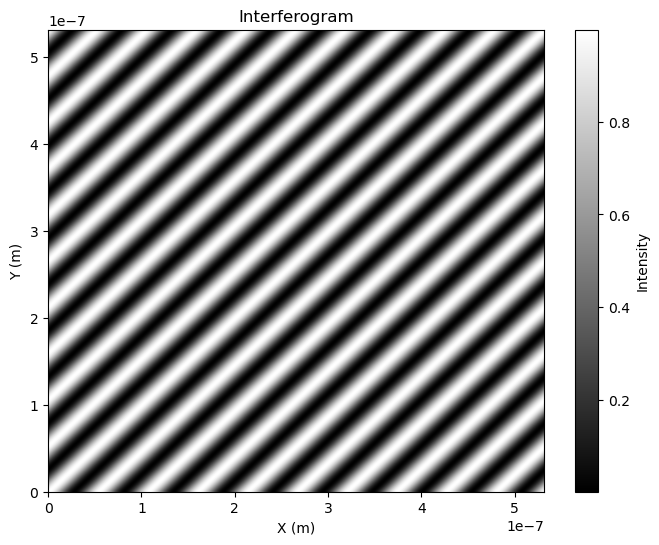


Second interferogram:


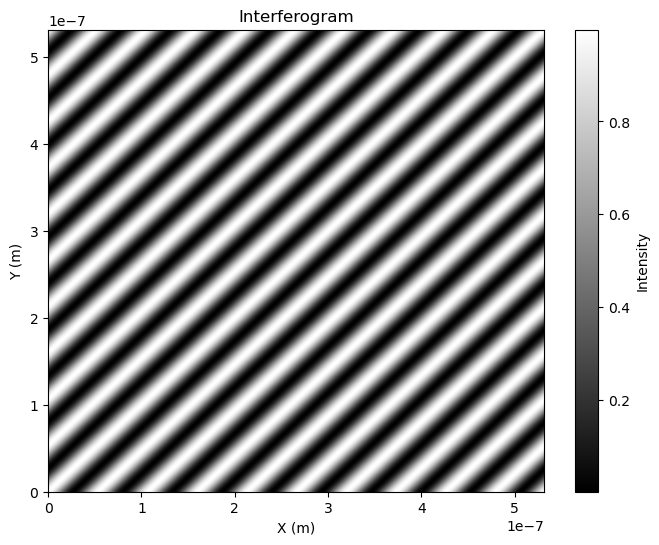

First output field calculation:
[[ 0.5       +0.j        ]
 [-0.83333334-0.23570224j]]

Reconstruction of the second output field:

First interferogram:


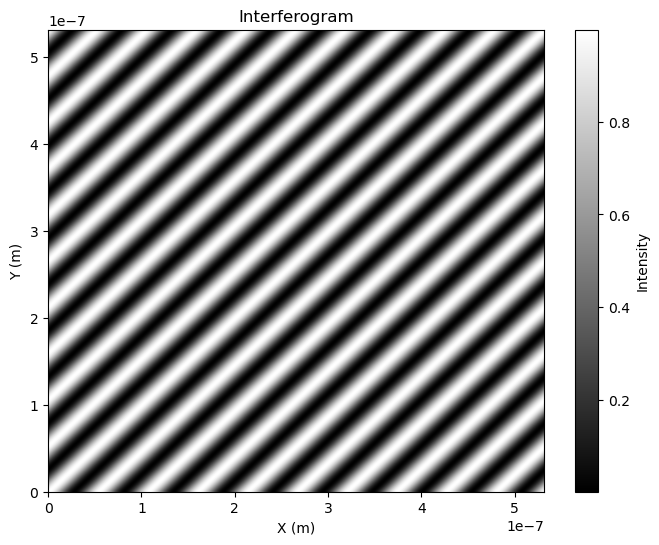


Second interferogram:


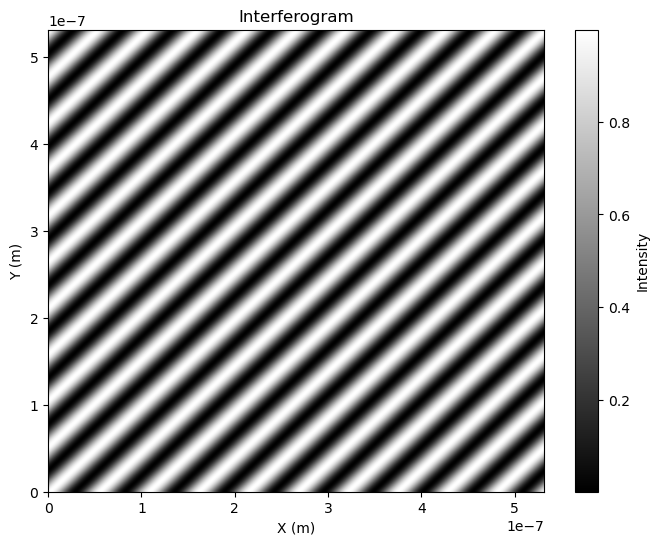

Second output field calculation:
[[ 0.86602541+0.j        ]
 [-0.28867514-0.40824828j]]

Birefringence determination
Determined matrix A:
[[ 0.96592583+0.j          0.        +0.25881905j]
 [-0.7933798 -0.45534178j  0.12200847+0.38513151j]] 

α (dominant direction): 0.1346π

Calculated value of Δχ: 0.0000π


In [27]:
a, b = experiment_simulation(E_in, np.pi/4, np.pi/8)

In [28]:
a

array([[0.5+0.j        ],
       [0.5+0.70710678j]])

In [29]:
b

array([[ 0.5       +0.j        ],
       [-0.83333334-0.23570224j]])